In [1]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4

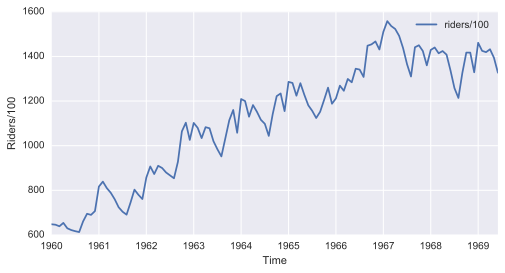

In [2]:
url = "https://raw.githubusercontent.com/welch/seasonal/master/data/TSDL/monthly-bus.12.csv"
riders = pd.read_csv(url, parse_dates=True, index_col=0)
ax = riders.plot()
ax.set_xlabel("Time")
ax.set_ylabel("Riders/100")
plt.show()

In [4]:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

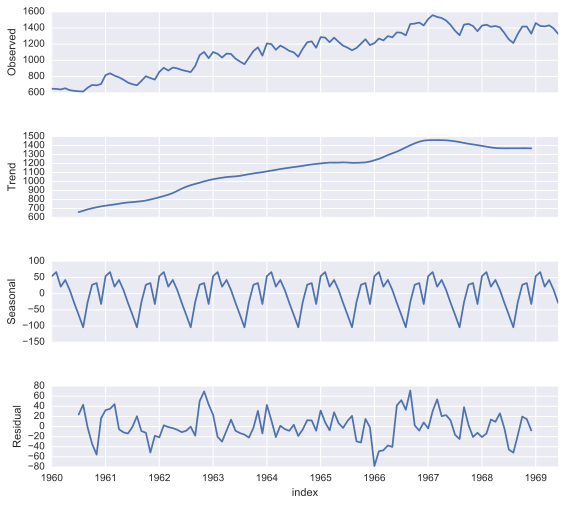

In [5]:
decomposition = seasonal_decompose(riders, freq=12)  
fig = decomposition.plot()
fig.set_figheight(8)
fig.set_figwidth(8)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  app.launch_new_instance()


Test Statistic   -1.536597
p-value           0.515336
dtype: float64


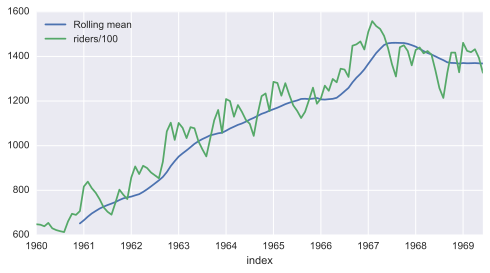

In [6]:
from statsmodels.tsa.stattools import adfuller

mean = pd.rolling_mean(riders, window=12)
mean.columns   = ["Rolling mean"]
ax = mean.plot()
ax = riders.plot(ax=ax)

names = ['Test Statistic','p-value']
print(pd.Series(adfuller(riders["riders/100"], autolag='AIC')[:2], index=names))

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()


Test Statistic   -9.258520e+00
p-value           1.427874e-15
dtype: float64


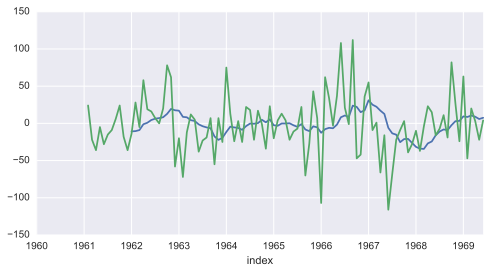

In [8]:

riders["first_diff"] = riders["riders/100"] - riders["riders/100"].shift(1)
riders["seasonal"] = riders.first_diff - riders.first_diff.shift(12)

mean = pd.rolling_mean(riders.seasonal, window=12)
mean.columns = ["Rolling mean"]
ax = mean.plot()
ax = riders.seasonal.plot(ax=ax)

names = ['Test Statistic','p-value']
print(pd.Series(adfuller(riders.seasonal.dropna(), autolag='AIC')[:2], index=names))

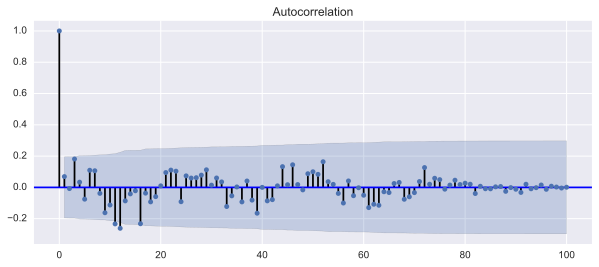

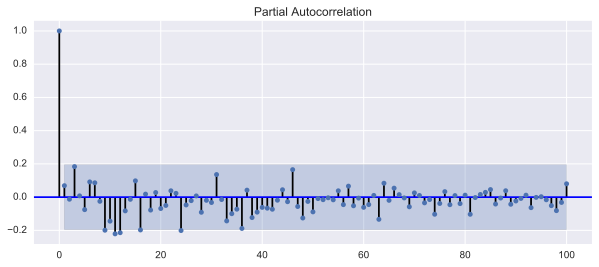

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
rcParams['figure.figsize'] = 10, 4
ax = plot_acf(riders.seasonal.dropna())
ax = plot_pacf(riders.seasonal.dropna())

In [10]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(riders.seasonal.dropna())  # Close to 2..?

1.8535149110388878

In [11]:
import science
science.do_research()


ImportError: No module named science

In [18]:
import numpy as np  # Importing numpy 'as' np is just to reduce typing...
np.median(np.arange(1, 10))

5.0

In [20]:
x = 16
np.sqrt(x)


4.0

In [28]:
np.mean(np.random.normal(size=100))

0.10454205318879238

In [ ]:
np.arange()